# RESEAU

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
from keras.applications import VGG16
from tensorflow.keras.layers import Dense, AveragePooling2D, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential

Using TensorFlow backend.


In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, AveragePooling2D, Dropout, Flatten, Dense, Activation, Input
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam



In [4]:
X, y = np.load("X.npy"), np.load("Y.npy")

In [5]:
y = np.array(to_categorical(y,2))

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
Xtest, Xvalid, ytest, yvalid = train_test_split(Xtest,ytest, test_size = 0.5)

In [8]:
print(Xtrain.shape)

(205, 224, 224, 3)


In [9]:
#load the VGG16 network, ensuring the head FC layer sets are left
baseModel = VGG16 (weights='imagenet',  
            input_shape=(224, 224, 3),
           include_top=False)
#loop over all layers in the base model and freeze them so they will *not* be updated during the first training process.
for layer in baseModel.layers:
    layer.trainable = False

In [10]:
#construct the head of the model that will be placed on top of the base model 
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(4,4)) (headModel)
headModel=Flatten(name="flatten")(headModel)
headModel=Dense(64, activation ="relu")(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2, activation="softmax")(headModel)#softmax ou sigmoid

In [11]:
#place the head FC model on top of the base model (this will become the actual model we will train)
model=Model(inputs=baseModel.input, outputs=headModel)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [12]:
#initialize the initial learning rate, batch size, and the optimizer
#compile our model 
opt = Adam(lr=1e-4)
model.compile(loss="binary_crossentropy", optimizer = opt, metrics=["accuracy"])#binary_crossentropy car on a 2 classes 
bs = 4

In [13]:
#initialize the training data augmentation object->made the learning more robust
datagen = ImageDataGenerator(rotation_range=15,fill_mode ="nearest")#rescale?, greyscale
train = datagen.flow(Xtrain, ytrain, batch_size = bs)

In [14]:
history = model.fit(train,
                    steps_per_epoch = len(Xtrain)//bs,
                    validation_data = (Xvalid, yvalid),
                    validation_steps = len(Xvalid)//bs,
                    epochs = 30)

Epoch 1/30
51/51 [==============================] - 50s 972ms/step - loss: 0.7592 - accuracy: 0.5771 - val_loss: 0.6063 - val_accuracy: 0.9091
Epoch 2/30
51/51 [==============================] - 57s 1s/step - loss: 0.6336 - accuracy: 0.6219 - val_loss: 0.5332 - val_accuracy: 1.0000
Epoch 3/30
51/51 [==============================] - 62s 1s/step - loss: 0.5742 - accuracy: 0.6965 - val_loss: 0.4565 - val_accuracy: 1.0000
Epoch 4/30
51/51 [==============================] - 63s 1s/step - loss: 0.5326 - accuracy: 0.7264 - val_loss: 0.3919 - val_accuracy: 1.0000
Epoch 5/30
51/51 [==============================] - 55s 1s/step - loss: 0.4424 - accuracy: 0.8431 - val_loss: 0.3460 - val_accuracy: 1.0000
Epoch 6/30
51/51 [==============================] - 48s 948ms/step - loss: 0.3966 - accuracy: 0.8687 - val_loss: 0.2755 - val_accuracy: 1.0000
Epoch 7/30
51/51 [==============================] - 52s 1s/step - loss: 0.3472 - accuracy: 0.9118 - val_loss: 0.2389 - val_accuracy: 1.0000
Epoch 8/30
51/

In [15]:
_,eval_accuracy = model.evaluate(Xtest, ytest, batch_size=bs)
 
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))

44/44 [==============================] - 15s 346ms/step
Accuracy: 100.00%


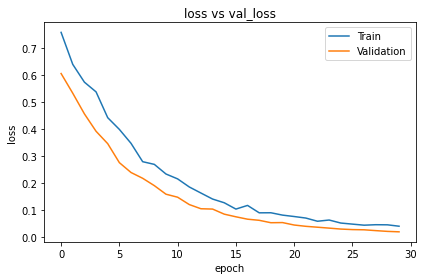

In [16]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('loss vs val_loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

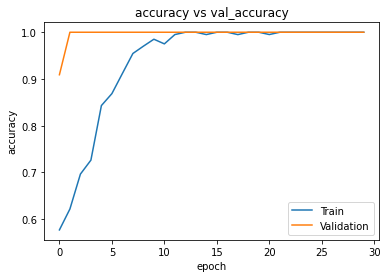

In [17]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('accuracy vs val_accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['Train', 'Validation'], loc='lower right')

In [24]:
#predict the output of an image
index=2
image=Xtest[index]
image=reshape_image_for_neural_network_input(image)

flatten the image
image.shape (150528, 1)
reshape the image to be similar to the input feature vector
image.shape (1, 224, 224, 3)


In [23]:
def reshape_image_for_neural_network_input(image, IMAGE_SIZE=224):
    print ("flatten the image")
    image = np.reshape(image,[IMAGE_SIZE* IMAGE_SIZE*3,1])
    print ("image.shape", image.shape)
    print ("reshape the image to be similar to the input feature vector")
    #image = np.reshape(image,[1,IMAGE_SIZE, IMAGE_SIZE,3]).astype('float')
    image = image.reshape(1,IMAGE_SIZE,IMAGE_SIZE,3).astype('float')
    print ("image.shape", image.shape)
    return image

In [25]:
predProb=model.predict(image, verbose=1)
print("true label: ", ytest[index])
print("predicted label: ", predProb)

1/1 [==============================] - 0s 497ms/step
true label:  [1. 0.]
predicted label:  [[0.9728258  0.02717422]]


In [26]:
#for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdx= np.argmax(predProb, axis=1)
print("predicted label: ", predIdx)

predicted label:  [0]


In [27]:
#confusion matrix tells us the performance of the model
predProb2=model.predict(Xtest, verbose=1)

#for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdx2= np.argmax(predProb2, axis=1)

from sklearn import datasets, svm, metrics
print(metrics.classification_report(ytest.argmax(axis=1),predIdx2))

44/44 [==============================] - 16s 366ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        26

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [28]:
#accuracy, sensitivity, and specificity
cm=metrics.confusion_matrix(ytest.argmax(axis=1),predIdx2)
total=sum(sum(cm))
acc=(cm[0,0]+cm[1,1])/total
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,1]/(cm[1,0]+cm[1,1])

#show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("accuracy: ", acc)
print("sensitivity:", sensitivity)
print("specificity: ", specificity)

[[18  0]
 [ 0 26]]
accuracy:  1.0
sensitivity: 1.0
specificity:  1.0


<AxesSubplot:>

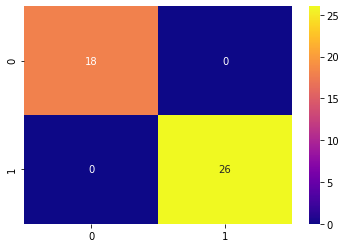

In [29]:
#heatmap
import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)